# NLP - Hotel Review sentiment analysis

# Importing Usual Libraries

In [6]:
import warnings

In [7]:
warnings.filterwarnings('ignore')

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [9]:
data= pd.read_csv('F:\Git\hotel-reviews.csv')

In [10]:
data

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [11]:
data.shape

(38932, 5)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [13]:
data.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id36890,This is a very beautiful hotel and the staff w...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [14]:
data.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id36890,1
Description,38932,38932,This is a very beautiful hotel and the staff w...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


# Checking Missing Values

In [15]:
count=data.isnull().sum().sort_values(ascending=False)

In [16]:
percentage=(data.isnull().sum()/len(data)*1000).sort_values(ascending=False)

In [17]:
missing_data=pd.concat([count,percentage], axis=1, keys=['count','percentage'])

In [18]:
missing_data

,count,percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


# Data Visualization

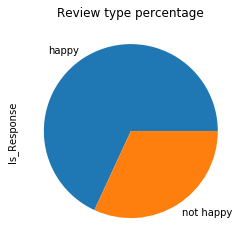

In [19]:
round(data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='pie')
plt.title('Review type percentage')
plt.show()

In [20]:
round(data.Is_Response.value_counts(normalize=True)*100,2)

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64

In [21]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


# Removing unnecessary Columns

In [22]:
data.drop(columns=['User_ID','Browser_Used','Device_Used'], inplace=True)

In [23]:
data.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,not happy
1,I stayed at the Crown Plaza April -- - April -...,not happy
2,I booked this hotel through Hotwire at the low...,not happy
3,Stayed here with husband and sons on the way t...,happy
4,My girlfriends and I stayed here to celebrate ...,not happy


# Cleaning the dataset with nltk

In [24]:

import nltk

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sadia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
def cleaned_data(text):
    import re
    import string
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('\[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = text.lower()
    text = re.sub('[''""]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text
clean1= lambda x: cleaned_data(x)

In [27]:
data['cleaned_description'] = pd.DataFrame(data.Description.apply(clean1))

In [28]:
data

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april -- - april -...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok. we paid extra for ...


In [29]:
from nltk.corpus import stopwords
corpus = []

from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features = 1500)
y= cv.fit_transform(data['cleaned_description'])

# Training the model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
independent=data.cleaned_description
dependent=data.	Is_Response

In [32]:
ind_train,ind_test,de_train ,de_test = train_test_split(independent,dependent, test_size=0.1,random_state = 225)

In [33]:
print('attribute_train :', len(ind_train))
print('attribute_test  :', len(ind_test))
print('target_train :', len(de_train))
print('target_test  :', len(de_test))

attribute_train : 35038
attribute_test  : 3894
target_train : 35038
target_test  : 3894


# Creating Pipeline

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression()

In [35]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])

model.fit(ind_train, de_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [36]:
from sklearn.metrics import confusion_matrix

predict = model.predict(ind_test)

confusion_matrix(predict, de_test)

array([[2411,  299],
       [ 160, 1024]], dtype=int64)

# Model Prediction

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predict, de_test))
print("Precision : ", precision_score(predict, de_test, average = 'weighted'))
print("Recall : ", recall_score(predict, de_test, average = 'weighted'))

Accuracy :  0.8821263482280431
Precision :  0.8879722340826498
Recall :  0.8821263482280431


# Testing the model

In [38]:
example_text = ["I'm unhappy now"]
example_result = model.predict(example_text)

print(example_result)

['not happy']
